<img src = "https://github.com/VeryFatBoy/notebooks/blob/main/common/images/img_github_singlestore-jupyter_featured_2.png?raw=true">

<div id="singlestore-header" style="display: flex; background-color: rgba(235, 249, 245, 0.25); padding: 5px;">
    <div id="icon-image" style="width: 90px; height: 90px;">
        <img width="100%" height="100%" src="https://raw.githubusercontent.com/singlestore-labs/spaces-notebooks/master/common/images/header-icons/browser.png" />
    </div>
    <div id="text" style="padding: 5px; margin-left: 10px;">
        <div id="badge" style="display: inline-block; background-color: rgba(0, 0, 0, 0.15); border-radius: 4px; padding: 4px 8px; align-items: center; margin-top: 6px; margin-bottom: -2px; font-size: 80%">SingleStore Notebooks</div>
        <h1 style="font-weight: 500; margin: 8px 0 0 4px;">Accessing SingleStoreDB using the Python Client</h1>
    </div>
</div>

In [1]:
!pip install matplotlib pandas plotly scikit-learn seaborn singlestoredb --quiet --no-warn-script-location

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import singlestoredb as s2
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
conn = s2.connect(
    host = "<host>",
    port = "3306",
    user = "admin",
    password = "<password>",
    database = "iris_demo",
    results_type = "tuples"
)

In [4]:
url = "https://gist.githubusercontent.com/VeryFatBoy/9af771d443f5ec4dd6eec8d69a062638/raw/c03ef25a97f23a48ee408ac02114195b663a2364/iris.csv"

df = pd.read_csv(url)

In [5]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
stmt = """
    INSERT INTO iris (
        sepal_length,
        sepal_width,
        petal_length,
        petal_width,
        species
    ) VALUES (%s, %s, %s, %s, %s)
"""

In [7]:
with conn:
    conn.autocommit(True)
    with conn.cursor() as cur:
        cur.execute("DROP TABLE IF EXISTS iris")
        cur.execute("""
            CREATE TABLE IF NOT EXISTS iris (
                sepal_length FLOAT,
                sepal_width FLOAT,
                petal_length FLOAT,
                petal_width FLOAT,
                species VARCHAR(20)
            )
        """)
        cur.executemany(stmt, df)
        cur.execute("SELECT * FROM iris")
        rows = cur.fetchall()

In [8]:
iris_df = pd.DataFrame(rows, columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
])

In [9]:
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.8,3.1,1.6,0.2,Iris-setosa
1,6.6,3.0,4.4,1.4,Iris-versicolor
2,5.0,2.3,3.3,1.0,Iris-versicolor
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.1,2.6,5.6,1.4,Iris-virginica


In [10]:
# https://plotly.com/python/pca-visualization/

X = iris_df[[
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width"
]]

pca = PCA(n_components = 2)
components = pca.fit_transform(X)

pca_fig = px.scatter(
    components,
    x = 0,
    y = 1,
    color = iris_df["species"]
)

pca_fig.show(renderer = "iframe")

[]

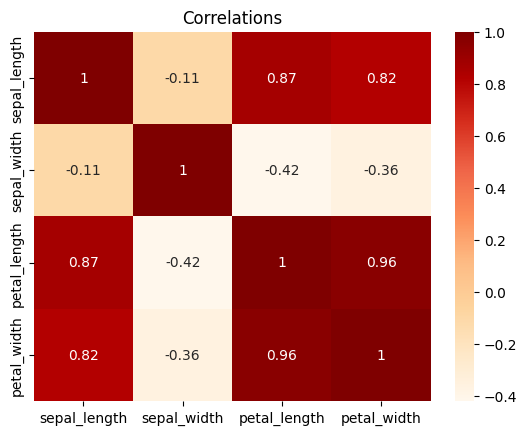

In [11]:
sns.heatmap(
    iris_df.drop(columns = ["species"]).corr(),
    cmap = "OrRd",
    annot = True
)

plt.title("Correlations")
plt.plot()